In [106]:
import matplotlib.pyplot as plt
import numpy as np


NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class BanditArm:
    def __init__(self, p):
        # p: the win rate
        # P_estimate: the estimate of the win rate
        self.p = p
        self.p_estimate = 0
        self.N = 0

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        # formula to use for estimate win rate
        
        self.N += 1
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N


def experiment():
    bandits = [BanditArm(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    
    num_times_explored = 0
    
    num_times_exploited = 0
    
    num_optimal = 0
    
    optimal_j = np.argmax([b.p for b in bandits])
    
    print("optimal j:", optimal_j)

    for i in range(NUM_TRIALS):

        # use epsilon-greedy to select the next bandit
        
        if np.random.random() < EPS:
        # the explore part, randomly select a bandit
        # j can be 0, 1, 2
        
            num_times_explored += 1
            j = np.random.randint(len(bandits))
        else:
        # exploit part, select the bandot with the 
        # maximum estimate probability
            
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])

        if j == optimal_j:
            num_optimal += 1

        # pull the arm for the bandit with the largest sample
        # get the rewards 
        x = bandits[j].pull()

        # update rewards log
        
        rewards[i] = x

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)

    

  # print mean estimates for each bandit
    for idx, b in enumerate(bandits):
        print("mean estimate:", b.p_estimate)

        # print total reward
        print("total reward earned:", rewards.sum())
        print("overall win rate:", rewards.sum() / NUM_TRIALS)
        print("num_times_explored:", num_times_explored)
        print("num_times_exploited:", num_times_exploited)
        print("num times selected optimal bandit:", num_optimal)

        # plot the results
        cumulative_rewards = np.cumsum(rewards)
        win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
        plt.figure(figsize=(8,6))
        plt.title('Explore and Exploit for Bandit '+ str(idx))
        plt.plot(win_rates)
        plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
        plt.show()
        
        


optimal j: 2
mean estimate: 0.1897018970189703
total reward earned: 7248.0
overall win rate: 0.7248
num_times_explored: 1015
num_times_exploited: 8985
num times selected optimal bandit: 9089


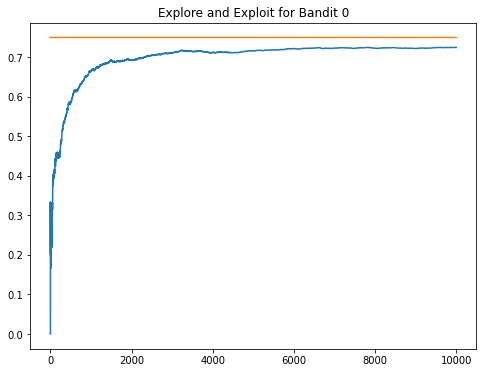

mean estimate: 0.4870848708487085
total reward earned: 7248.0
overall win rate: 0.7248
num_times_explored: 1015
num_times_exploited: 8985
num times selected optimal bandit: 9089


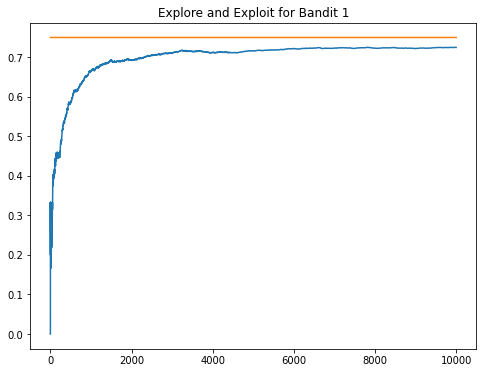

mean estimate: 0.7606997469468589
total reward earned: 7248.0
overall win rate: 0.7248
num_times_explored: 1015
num_times_exploited: 8985
num times selected optimal bandit: 9089


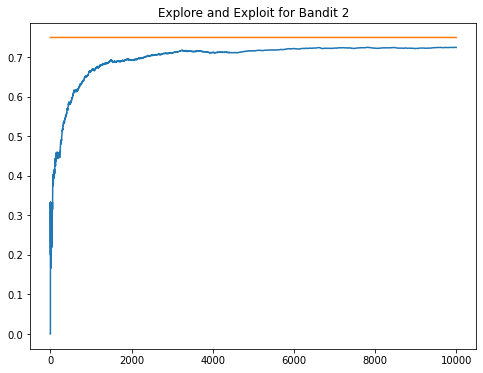

In [107]:
if __name__ == "__main__":
    experiment()